In [2]:
#-----------------------------------------------------------------------
# diag_to_zero_continuous_E[vv2].py
# Author: Rebecca Barber
# 
# calculate the expected max virtual value of the non-favorite item 
# for n bidders. relevant flow: the diagonal one where everything points
# to zero. continuous setting. use formula derived with matt on 4/13
#-----------------------------------------------------------------------

import scipy.stats as st
from statistics import *
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
from math import *
import pandas as pd
from plotnine import *
from random import * 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ER draws

In [3]:
# draw w and beta
def draw_alpha_beta():
    alpha = random()
    beta = random()
    return alpha, beta

# Flow Simulation

In [4]:
# simulates flow given n bidders and m items
# essentially just arranging the n*m values and using
# the given mechanism to "star" values
def calc_vv2(n):
    # calc vv for each bidder
    all_vvs = []
    for i in range(n):
        alpha, beta = draw_alpha_beta()
        num = alpha
        denom = (1-beta+alpha*beta)**2
        vv = num/denom
        all_vvs.append(vv)
        
    max_vv2 = max(max(all_vvs),0)
    return max_vv2

# Variable Updates

In [14]:
num_trials = 100000
min_bidders = 100 
max_bidders = 500
bidder_step = 10

num_bidders = []
for i in range(min_bidders, max_bidders+1, bidder_step):
    num_bidders.append(i)
print(num_bidders)

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


# Main

In [15]:
avg_vv2s = []

print('number of bidders:')
for n in range(min_bidders, max_bidders+1, bidder_step):
    print(n, end = "")

    # run num_trials for each # of bidders so we can 
    # take the average
    all_vv2s = []
    for i in range(num_trials):
        max_vv2 = calc_vv2(n)
        all_vv2s.append(max_vv2)  
    mean_vv2 = mean(all_vv2s)
    avg_vv2s.append(mean_vv2)
    print(':', mean_vv2)

# save all of the data
csv_file = './data/diag_to_zero_continuous_E[vv2]_' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.csv'

df = pd.DataFrame(columns=['num bidders', 'avg VV_2'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    avg_vv2 = avg_vv2s[i]
    df = df.append({'num bidders': n, 'avg VV_2': avg_vv2}, ignore_index=True)

df.to_csv(csv_file)

number of bidders:
100: 7.45746398160515
110: 7.842566702925921
120: 8.147974216223355
130: 8.480282509032351
140: 8.905999172006348
150: 9.06872952124137
160: 9.344163599249695
170: 9.550504535471758
180: 10.019517857872676
190: 10.149485396113958
200: 10.437285787801285
210: 10.66357383846506
220: 10.955311094960424
230: 11.20674337442823
240: 11.353530179087397
250: 11.54650509480031
260: 11.782237834420137
270: 12.13960023633748
280: 12.299535152242981
290: 12.50826157186163
300: 12.810745495825097
310: 12.911612929370175
320: 13.183004093827941
330: 13.285942661816739
340: 13.489811881652155
350: 13.739116920221418
360: 13.955953444345703
370: 13.912578123060278
380: 14.237740333990084
390: 14.430633029988412
400: 14.75505516693969
410: 14.732831121051847
420: 15.03676704854263
430: 15.12849872401449
440: 15.371987253550378
450: 15.469355650077905
460: 15.729761698275333
470: 15.951125969379405
480: 15.98707441823967
490: 16.175210503806262
500: 16.395023921781814


# Plotting

<Figure size 648x360 with 0 Axes>

Text(0.5, 1.0, 'Continuous Pure Diagonal Flow')

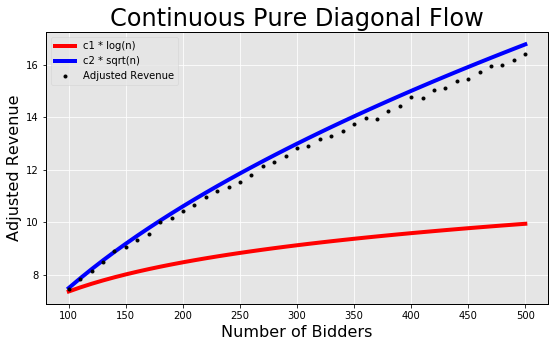

In [24]:
# plot the results
title = 'Continuous Pure Diagonal Flow'
log_bench = [1.6*np.log(n) for n in num_bidders]
sqrt_bench = [0.75*np.sqrt(n) for n in num_bidders]

plt1 = plt.style.use('ggplot')
plt.figure(figsize=(9,5))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    plt.plot(num_bidders, log_bench, 'r-',
        num_bidders, sqrt_bench, 'b-',
         num_bidders, avg_vv2s,'ko', 
         markersize=3, linewidth = 4)
plt.legend(['c1 * log(n)', 'c2 * sqrt(n)', 'Adjusted Revenue'])
plt.title(title, fontsize = 24)
xlab = plt.xlabel('Number of Bidders', fontsize=16)
ylab = plt.ylabel('Adjusted Revenue', fontsize=16)
xlab.set_color('black')
ylab.set_color('black')

In [17]:
# For fitting y = B + A log x, just fit y against (log x)
# For fitting y = B + A sqrt n, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), avg_vv2s, 1, full = True)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), avg_vv2s, 1, full = True)
print('log fit: \na =', log_fit[0][0], '\nb =', log_fit[0][1], '\nerror =', log_fit[1][0])
print('\nsqrt fit: \na =', sqrt_fit[0][0], '\nb =', sqrt_fit[0][1], '\nerror =', sqrt_fit[1][0])

log fit: 
a = 5.658835333043834 
b = -19.30357666402398 
error = 3.401282013320418

sqrt fit: 
a = 0.7177207090806709 
b = 0.28886049454597873 
error = 0.15705811128049404
